In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Read in and explore dataset

The dataset we're using today is classification.csv. Let's read it in, and create the X and y matrices from it.

In [2]:
df = pd.read_csv("datasets/classification.csv")
X = np.c_[np.array(df["age"]), np.array(df["interest"])]
y = np.array(df["success"])

## Creating and plotting the training set

Let's create the train and test sets adn take a look at the training set through a scatter plot. Does it seem reasonable that KNN will work on this task?

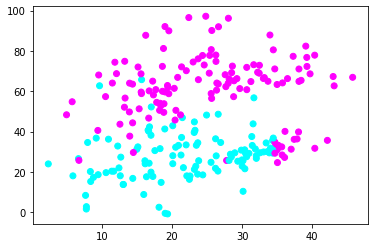

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="cool")

## How many neighbors should we use?

Let's split up our dataset further into a validation set.

In [4]:
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=123)

## Using validation to determine number of neighbors

Let's use the new validation set to help us pick the number of neighbors.

In [5]:
for k in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_subtrain,y_subtrain)
    y_predict = neigh.predict(X_val)
    print(k, accuracy_score(y_val, y_predict))

1 0.7666666666666667
2 0.8666666666666667
3 0.9333333333333333
4 0.9333333333333333
5 0.9333333333333333
6 0.9
7 0.9333333333333333
8 0.9
9 0.9


## Decision Boundaries

How do we make a decision boundary for our classifiers? Let's start with calculating the minimum and maximum values for our two dimensions (and give some padding on either side).

In [6]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min  = X_train[:, 1].min() - 1 
y_max = X_train[:, 1].max() + 1

### Creating the meshgrid

We can use numpy's meshgrid function to build out a set of values to evaluate.

In [7]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

### Creating the set of values to predict from

We can use a combination of np.c_() and ravel() to build our new dataset we're going to evaluate.

In [8]:
new_x = np.c_[xx.ravel(), yy.ravel()]

### Predicting from our new dataset

Let's create the predictions from our classifier and reshape them appropriately.

In [9]:
new_y = neigh.predict(new_x)
zz = new_y.reshape(xx.shape)

## Creating a contour map

Let's use contourf to draw a filled contour map and let's plot our training set on top.

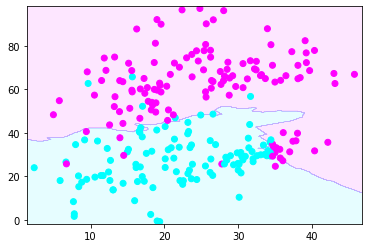

In [10]:
plt.contourf(xx, yy, zz, alpha=0.1,cmap="cool")
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap="cool")

## Changing number of neighbors

What happens to the decision boundary as you change the number of neighbors?

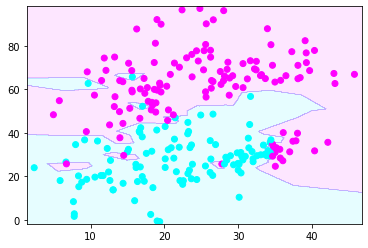

In [11]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
new_y = neigh.predict(new_x)
zz = new_y.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.1,cmap="cool")
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap="cool")

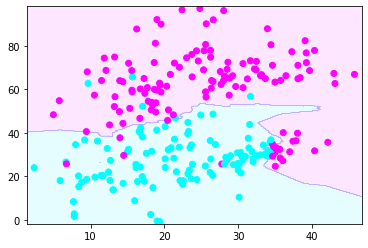

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
new_y = neigh.predict(new_x)
zz = new_y.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.1,cmap="cool")
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap="cool")

## Confusion Matrices

We can also visualize information about how the classifier works with a confusion matrix.

In [19]:
from sklearn.metrics import confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
y_predict = neigh.predict(X_test)
print(confusion_matrix(y_test, y_predict))
for i in range(len(y_test)):
    if (y_test[i] != y_predict[i]):
        print(y_test[i], y_predict[i])

[[17  2]
 [ 1 40]]
0.0 1.0
1.0 0.0
0.0 1.0
